In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [5]:
main_folder = r"C:\Users\alexa\eclipse-workspace\GWOPSOAlgorithmMain\Assignment #2"
df = []
csv_filenames = []
dfComplete = {}
file_sizes = 46882
outputs = 27890
iterations = range(1, 21)
vmCounts = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
cloudletCounts = [1000]
algorithms = ["GWO", "PSO", "GWO-PSO", "DGWO"]

MSresults = {}
EXEresults = {}
RESresults = {}
transmisResults = {}


for algorithm in algorithms:
    for vm in vmCounts:
        for cloudlet in cloudletCounts:
            MSTotalValues = []
            EXETotalValues = []
            RESTotalValues = []
                    
            for iteration in iterations:
                filename = f"CloudletInfo - {algorithm} -  File Size -  {file_sizes} - Output - {outputs} Number of Virual Machines - {vm} Number of Cloudlets - {cloudlet} Iteration - {iteration}.csv"
                file_path = os.path.join(main_folder, filename)
                        
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)  
                    csv_filenames.append(filename)
                    dfComplete[filename] = df
                    MSRowValue = df.iloc[-1, 10]
                    MSTotalValues.append(MSRowValue)
                    EXERowValue = df.iloc[-1, 12]
                    EXETotalValues.append(EXERowValue)
                    RESRowValue = df.iloc[-1, 11]
                    RESTotalValues.append(RESRowValue)

                        
                MSAverageValue = np.mean(MSTotalValues)
                MSkey = (algorithm, file_sizes, outputs, vm, cloudlet)
                MSresults[MSkey] = MSAverageValue

                EXEAverageValue = np.mean(EXETotalValues)
                EXEkey = (algorithm, file_sizes, outputs, vm, cloudlet)
                EXEresults[EXEkey] = EXEAverageValue

                RESAverageValue = np.mean(RESTotalValues)
                RESkey = (algorithm, file_sizes, outputs, vm, cloudlet)
                RESresults[RESkey] = RESAverageValue

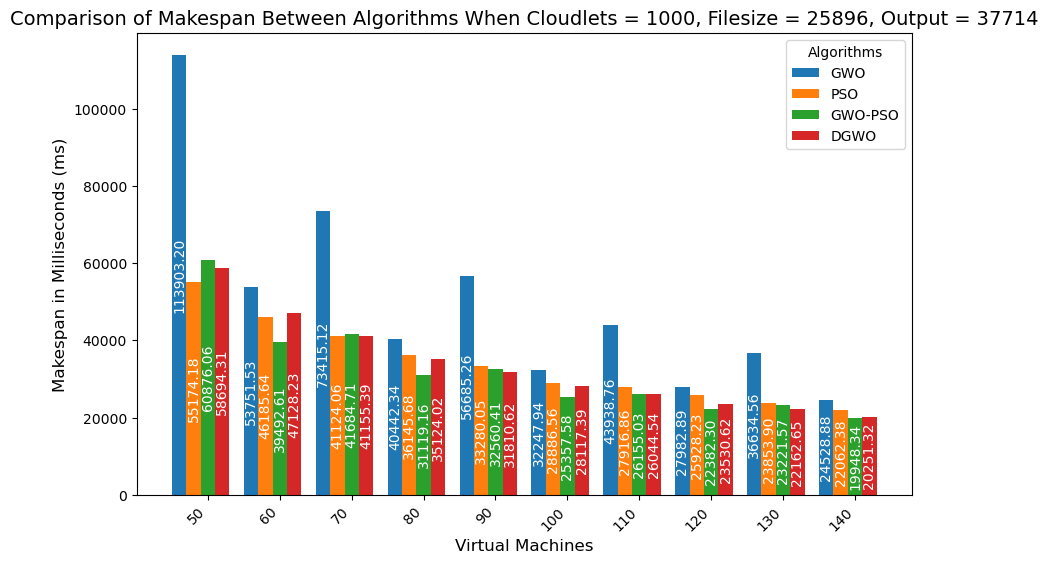

In [11]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for vm in vmCounts:
        key = (algo, file_sizes, outputs, vm, 1000)  
        if key in MSresults:
            algorithm_results[algo].append(MSresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_vmCounts = []

for i, vm in enumerate(vmCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_vmCounts.append(vm)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

bar_width = 0.8 / len(algorithms)
index = np.arange(len(filtered_vmCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90)     

plt.xlabel("Virtual Machines", fontsize=12)
plt.ylabel("Makespan in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Makespan Between Algorithms When Cloudlets = 1000, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + (len(algorithms) * bar_width) / 2, filtered_vmCounts, rotation=45, ha='right')
plt.legend(title='Algorithms')

plt.savefig('Comparison of Makespan Between Algorithms When When Cloudlets = 1000 - Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()

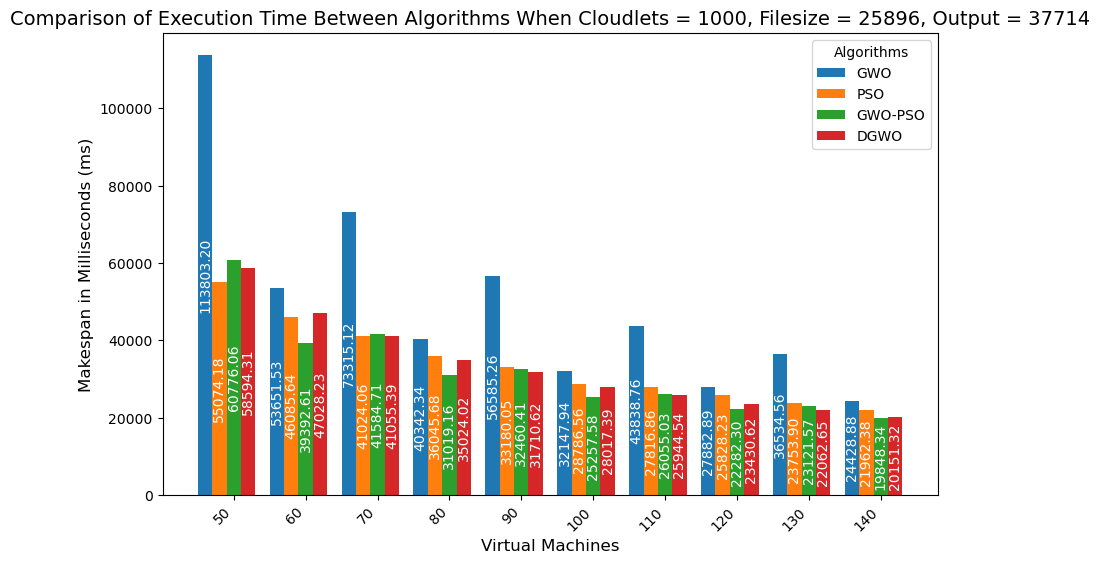

In [15]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for vm in vmCounts:
        key = (algo, file_sizes, outputs, vm, 1000)  
        if key in EXEresults:
            algorithm_results[algo].append(EXEresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_vmCounts = []

for i, vm in enumerate(vmCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_vmCounts.append(vm)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

bar_width = 0.8 / len(algorithms)
index = np.arange(len(filtered_vmCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90)

plt.xlabel("Virtual Machines", fontsize=12)
plt.ylabel("Makespan in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Execution Time Between Algorithms When Cloudlets = 1000, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + (len(algorithms) * bar_width) / 2, filtered_vmCounts, rotation=45, ha='right')
plt.legend(title='Algorithms')

plt.savefig('Comparison of Execution Time Between Algorithms When Cloudlets = 1000 - Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()

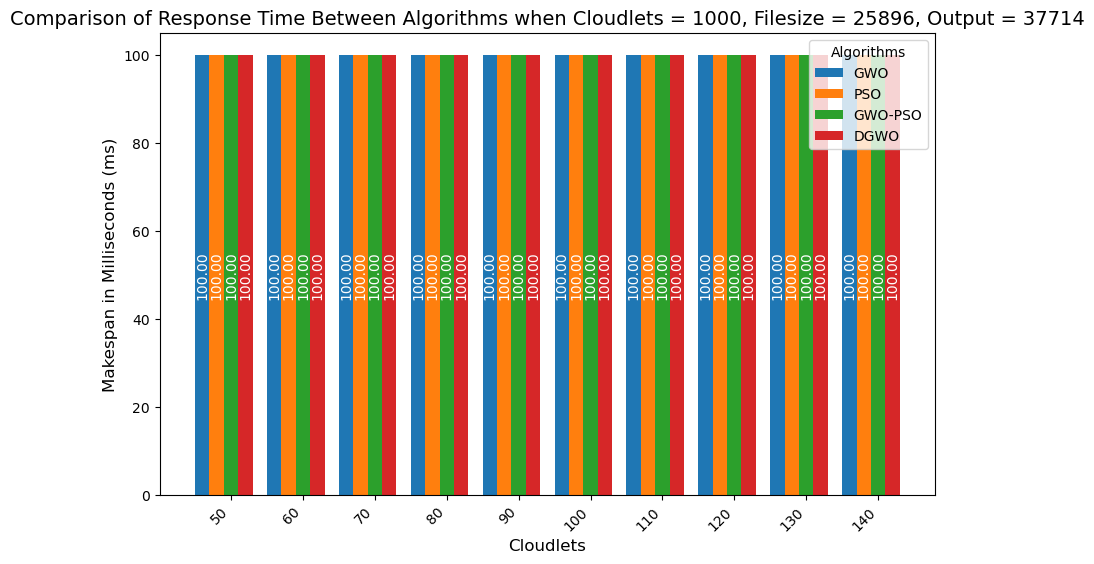

In [17]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for vm in vmCounts:
        key = (algo, file_sizes, outputs, vm, 1000)  
        if key in RESresults:
            algorithm_results[algo].append(RESresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_vmCounts = []

for i, vm in enumerate(vmCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_vmCounts.append(vm)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

bar_width = 0.8 / len(algorithms)
index = np.arange(len(filtered_vmCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90)    

plt.xlabel("Cloudlets", fontsize=12)
plt.ylabel("Makespan in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Response Time Between Algorithms when Cloudlets = 1000, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + (len(algorithms) * bar_width) / 2, filtered_vmCounts, rotation=45, ha='right')
plt.legend(title='Algorithms')

plt.savefig('Comparison of Response Time Between Algorithms when Cloudlets = 1000 - Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()